In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [3]:
path = '/home/jewelle/data_bootcamp/'
flights_df =  pd.read_csv(path +'flights_sub.csv')
passengers_df = pd.read_csv(path +'passengers_sub.csv')

In [4]:
flights_df.drop(['Unnamed: 0', 'dup', 'mkt_unique_carrier', 'no_name'], axis = 1)

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-01-23,UA_CODESHARE,UA,3405,YX,N653RW,3405,10821,BWI,"Baltimore, MD",...,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-11-15,AA_CODESHARE,AA,5683,OH,N594NN,5683,11057,CLT,"Charlotte, NC",...,1.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-29,WN,WN,2434,WN,N432WN,2434,12889,LAS,"Las Vegas, NV",...,1.0,867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-14,B6,B6,577,B6,N968JT,577,11697,FLL,"Fort Lauderdale, FL",...,1.0,2584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-22,DL_CODESHARE,DL,3762,OO,N8933B,3762,10397,ATL,"Atlanta, GA",...,1.0,508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-04-12,WN,WN,1844,WN,N789SW,1844,11292,DEN,"Denver, CO",...,1.0,957.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,2018-03-30,WN,WN,374,WN,N903WN,374,14908,SNA,"Santa Ana, CA",...,1.0,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,2018-10-11,AA_CODESHARE,AA,5657,OH,NaN,5657,11057,CLT,"Charlotte, NC",...,1.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,2019-06-05,DL_CODESHARE,DL,5283,9E,N935XJ,5283,12953,LGA,"New York, NY",...,1.0,544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
passengers_df.head()

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,0.0,3.0,9900.0,18.0,0.0,0.0,0.0,95.0,124.0,...,US,United States,4,416,1,2018,12,1,G,DU
1,1,30.0,29.0,1136299.0,4607.0,3741.0,309.0,0.0,1183.0,5392.0,...,US,United States,6,694,1,2017,5,3,F,DU
2,2,19.0,19.0,322840.0,1235.0,556.0,0.0,0.0,604.0,2192.0,...,US,United States,6,631,1,2017,9,2,F,DU
3,3,142.0,142.0,4245800.0,15616.0,12519.0,2739.0,7470.0,235.0,10759.0,...,US,United States,6,608,1,2019,10,1,F,DU
4,4,0.0,1.0,28603.0,99.0,54.0,0.0,0.0,121.0,61.0,...,US,United States,6,678,1,2015,8,1,L,DU


In [11]:
passengers_df.drop(['Unnamed: 0'], axis=1, inplace=True)

Keep in mind:
Airport codes are unique, one city (origin/dest) can have multiple airports.

In [53]:
#check origin airport codes
passengers_df['origin'].unique()
#Quick google search will confirm these are unique IATA airport codes

array(['KPN', 'MSY', 'LGA', 'ORD', 'ACY', 'AEX', 'LAX', 'PHL', 'PDX',
       'MKE', 'IAD', 'BWI', 'FSM', 'OAK', 'MSP', 'FLL', 'FRA', 'EWR',
       'RDB', 'STL', 'DEN', 'ABQ', 'CDB', 'FAT', 'MYR', 'SJD', 'SFO',
       'FAB', 'COS', 'LAS', 'DFW', 'MEX', 'ATL', 'JFK', 'ICN', 'FVT',
       'PSM', 'PHX', 'BFI', 'SEA', 'PUJ', 'SNN', 'VNY', 'AUK', 'ENV',
       'PGS', 'PVR', 'SAT', 'ACK', 'MCI', 'SDF', 'TYS', 'BLV', 'BRW',
       'GTR', 'DCA', 'DTW', 'GSO', 'RIC', 'PIT', 'NUI', 'MNT', 'AUA',
       'SLC', 'MFE', 'WWT', 'IAH', 'MCO', 'HOU', 'TRI', 'JAX', 'RDU',
       'MIA', 'YYC', 'CAE', 'BOS', 'IND', 'GPT', 'GSP', 'MEM', 'SAN',
       'CVG', 'KTN', 'OGG', 'CLT', 'CRP', 'RSH', 'OME', 'EUG', 'BNA',
       'YIP', 'NAS', 'HCR', 'SPN', 'UNK', 'OWB', 'ORV', 'BLD', 'BJI',
       'MAD', 'BET', 'CGA', 'PTY', 'VQS', 'AVL', 'GDL', 'MYU', 'TPA',
       'KOT', 'TNK', 'SNA', 'TIQ', 'HKG', 'PGA', 'PIE', 'BIL', 'TN8',
       'BUF', 'ICT', 'SJC', 'CUN', 'PBI', 'SCE', 'ATT', 'FAI', 'KAL',
       'TVC', 'HYL',

In [54]:
#group passengers by airports of origin and destination, look at top 10
passengers_og = pd.DataFrame(passengers_df.groupby('origin')
                             ['passengers'].sum().reset_index()).rename({'passengers': 'total_passengers'}, axis=1)
passengers_airports_og = passengers_og.sort_values(by='total_passengers', ascending=False)[:10]

In [55]:
passengers_d = pd.DataFrame(passengers_df.groupby('dest')
                            ['passengers'].sum().reset_index()).rename({'passengers': 'total_passengers'}, axis=1)
passengers_airports_dest = passengers_d.sort_values(by='total_passengers', ascending=False)[:10]

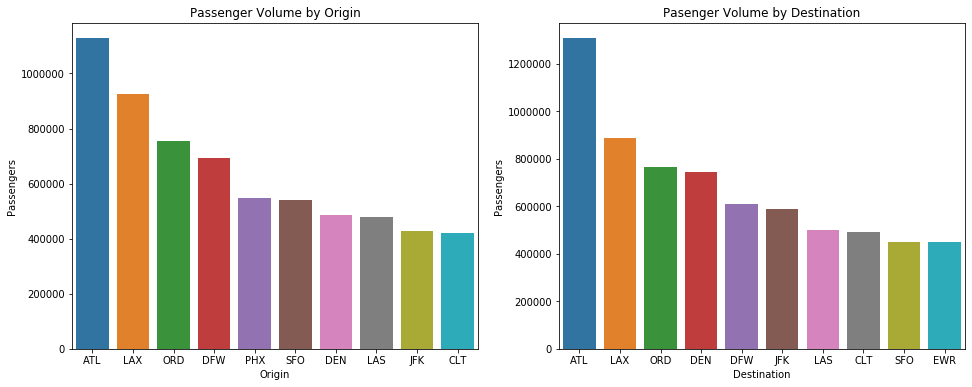

In [75]:
f, axes = plt.subplots(1, 2, figsize=(16,6))

ax1 = sns.barplot(x='origin', y='total_passengers', data=passengers_airports_og, ax=axes[0])
ax2 = sns.barplot(x='dest', y='total_passengers', data=passengers_airports_dest, ax=axes[1])

ax1.set(title='Passenger Volume by Origin', xlabel='Origin', ylabel='Passengers')
ax2.set(title='Pasenger Volume by Destination', xlabel='Destination', ylabel='Passengers');

Airports with 8/10 highest passenger volume: ATL, LAX, ORD, DFW, DEN, SFO, JFK, LAS, CLT, sharing high passenger volumes for both origin and destination points.  EWR and PHX round the lists out, but only make the top 10 on one point. 

In [58]:
#check flights_df origin codes
flights_df['origin'].unique()
#there are fewer airport codes here than in passengers.

array(['BWI', 'CLT', 'LAS', 'FLL', 'ATL', 'MKE', 'MCI', 'ORD', 'LEX',
       'SMF', 'SAN', 'DFW', 'IAH', 'MGM', 'MIA', 'RNO', 'EWR', 'STL',
       'SEA', 'PHL', 'SLC', 'COU', 'DEN', 'PIT', 'OMA', 'ELP', 'PAH',
       'SHD', 'LAX', 'PAE', 'DCA', 'PHX', 'ANC', 'MCO', 'OKC', 'OAK',
       'HNL', 'RDU', 'SJC', 'USA', 'BOS', 'PDX', 'MHT', 'SAT', 'JFK',
       'MSP', 'PIE', 'CMH', 'MEM', 'PVD', 'CVG', 'BUR', 'ILM', 'DTW',
       'SDF', 'STT', 'LNY', 'SFO', 'BRO', 'CAE', 'HSV', 'RIC', 'CIU',
       'VPS', 'SNA', 'BOI', 'LSE', 'BNA', 'AMA', 'LCK', 'LGA', 'IAD',
       'SGU', 'TVC', 'SBN', 'ISP', 'LGB', 'TPA', 'CLE', 'DSM', 'RSW',
       'MDW', 'DAL', 'GRR', 'FAY', 'SAV', 'FAT', 'AUS', 'ORF', 'MDT',
       'DAY', 'ALB', 'KOA', 'GNV', 'GRB', 'FSD', 'SHV', 'BUF', 'BDL',
       'SBP', 'GJT', 'SJU', 'TUS', 'AVL', 'CHS', 'IND', 'MSY', 'MTJ',
       'GSP', 'CAK', 'MSN', 'TLH', 'MLI', 'EAU', 'XNA', 'TUL', 'CRP',
       'GEG', 'YUM', 'PSP', 'BHM', 'HOU', 'SBA', 'SUX', 'BGR', 'MRY',
       'LIT', 'CRW',

In [59]:
airports_og = pd.DataFrame(flights_df.groupby('origin')
                           ['fl_date'].count().reset_index()).rename({'fl_date': 'flight_count'}, axis=1)
airports_dest = pd.DataFrame(flights_df.groupby('dest')
                             ['fl_date'].count().reset_index()).rename({'fl_date': 'flight_count'}, axis=1)

In [73]:
airports_og = airports_og.sort_values(by='flight_count', ascending=False)[:10]
airports_dest = airports_dest.sort_values(by='flight_count', ascending=False)[:10]

In [68]:
total_passengers = passengers_airports_og["total_passengers"]
airports_og = pd.concat([airports_og, total_passengers], axis = 1)

In [70]:
total_passengers = passengers_airports_dest["total_passengers"]
airports_dest = pd.concat([airports_dest, total_passengers], axis = 1)

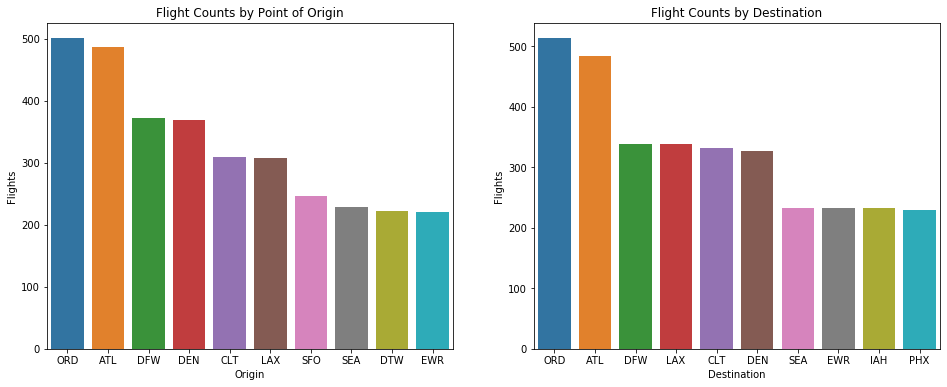

In [76]:
f, axes = plt.subplots(1, 2, figsize=(16,6))

ax1 = sns.barplot(x='origin', y='flight_count', data=airports_og, ax=axes[0])
ax2 = sns.barplot(x='dest', y='flight_count', data=airports_dest, ax=axes[1])

ax1.set(title='Flight Counts by Point of Origin', xlabel='Origin', ylabel='Flights')
ax2.set(title='Flight Counts by Destination', xlabel='Destination', ylabel='Flights');

Airports ATL, LAX, ORD, DFW, DEN, SFO, CLT, PHX, EWR share similarly high air traffic compared to passenger volume. SEA, DTW however, do not appear on the top 10 list for passenger volume, meaning they have more frequent flights than passengers.  Possible explanations for this discrepancy:
* small, frequent flights with fewer passengers
* cargo, or shipping hubs 